In [1]:
#increase the display size to 95% of window width
from IPython.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))
display(HTML("<style>.output_result { max-width:95% !important; }</style>"))

import os
import shutil
import subprocess
import gc
import xarray as xr
import numpy as np
import pymp

import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from matplotlib import rc
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from matplotlib.transforms import Bbox
from matplotlib.patches import FancyBboxPatch
from matplotlib.font_manager import FontProperties
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)
from scipy.interpolate import interp1d
from scipy.interpolate import interp2d

from functions.mandyocIO import read_mandyoc_output, read_datasets, change_dataset, _calc_melt_dry, _calc_melt_wet

path = os.getcwd().split('/') # Get local file
machine_path = '/'+path[1]+'/'+path[2] # Select home according to OS.

# Plot Melt Volume evolution for numerical scenarios

RFT_Clc1_DT200_PT1292oC_lit80km_1x1km2_NHK
RFT_Clc10_DT200_PT1292oC_lit80km_1x1km2_NHK
RFT_Clc1_DT290_PT1350oC_lit80km_1x1km2_NHK
RFT_Clc10_DT290_PT1350oC_lit80km_1x1km2_NHK
RFT_Clc1_DT350_PT1397oC_lit80km_1x1km2_NHK
RFT_Clc10_DT350_PT1397oC_lit80km_1x1km2_NHK
RTF_Clc1_DT200_PT1352oC_lit150km_1x1km2_NHK
RTF_Clc10_DT200_PT1352oC_lit150km_1x1km2_NHK
RFT_Clc1_DT290_PT1421oC_lit150km_1x1km2_NHK
RFT_Clc10_DT290_PT1421oC_lit150km_1x1km2_NHK
RTF_Clc1_DT350_PT1460oC_lit150km_1x1km2_NHK
RTF_Clc10_DT350_PT1460oC_lit150km_1x1km2_NHK


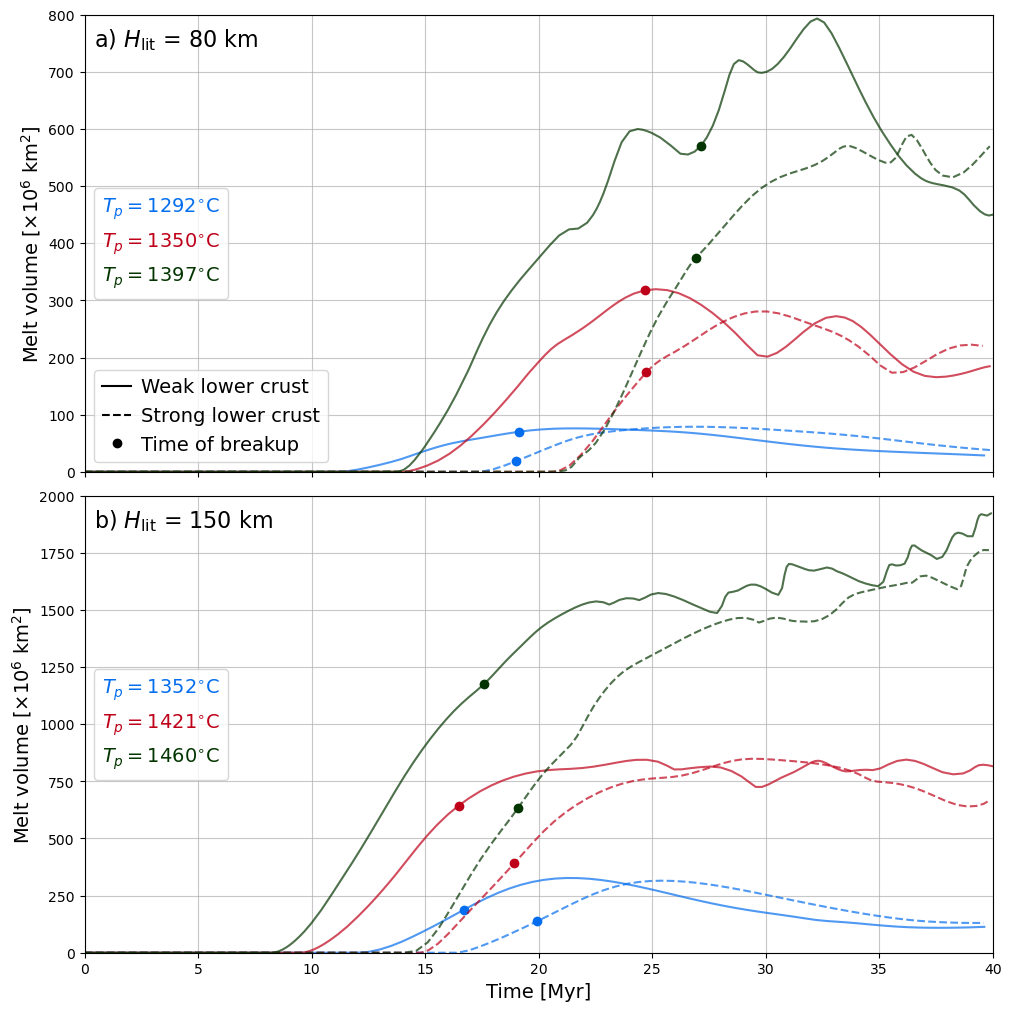

In [4]:
# Path to the model directory

groups =[#Hlit = 80 km
            ['/Doutorado/cenarios/mandyoc/rifting/lit80km/DT200_PT1292oC/1x1km2/NHK/RFT_Clc1_DT200_PT1292oC_lit80km_1x1km2_NHK',
             '/Doutorado/cenarios/mandyoc/rifting/lit80km/DT200_PT1292oC/1x1km2/NHK/RFT_Clc10_DT200_PT1292oC_lit80km_1x1km2_NHK',

             '/Doutorado/cenarios/mandyoc/rifting/lit80km/DT290_PT1350oC/1x1km2/NHK/RFT_Clc1_DT290_PT1350oC_lit80km_1x1km2_NHK',
             '/Doutorado/cenarios/mandyoc/rifting/lit80km/DT290_PT1350oC/1x1km2/NHK/RFT_Clc10_DT290_PT1350oC_lit80km_1x1km2_NHK',

             '/Doutorado/cenarios/mandyoc/rifting/lit80km/DT350_PT1397oC/1x1km2/NHK/RFT_Clc1_DT350_PT1397oC_lit80km_1x1km2_NHK',
             '/Doutorado/cenarios/mandyoc/rifting/lit80km/DT350_PT1397oC/1x1km2/NHK/RFT_Clc10_DT350_PT1397oC_lit80km_1x1km2_NHK'

            #  '/Doutorado/cenarios/mandyoc/rifting/lit80km/DT400_PT1437oC/1x1km2/NHK/RFT_Clc1_DT400_PT1437oC_lit80km_1x1km2_NHK',
            #  '/Doutorado/cenarios/mandyoc/rifting/lit80km/DT400_PT1437oC/1x1km2/NHK/RFT_Clc10_DT400_PT1437oC_lit80km_1x1km2_NHK',
            ],
                #Hlit = 150 km
            ['/Doutorado/cenarios/mandyoc/rifting/lit150km/DT200_PT1352oC/1x1km2/NHK/RTF_Clc1_DT200_PT1352oC_lit150km_1x1km2_NHK',
             '/Doutorado/cenarios/mandyoc/rifting/lit150km/DT200_PT1352oC/1x1km2/NHK/RTF_Clc10_DT200_PT1352oC_lit150km_1x1km2_NHK',

             '/Doutorado/cenarios/mandyoc/rifting/lit150km/DT290_PT1421oC/1x1km2/NHK/RFT_Clc1_DT290_PT1421oC_lit150km_1x1km2_NHK',
             '/Doutorado/cenarios/mandyoc/rifting/lit150km/DT290_PT1421oC/1x1km2/NHK/RFT_Clc10_DT290_PT1421oC_lit150km_1x1km2_NHK',

             '/Doutorado/cenarios/mandyoc/rifting/lit150km/DT350_PT1460oC/1x1km2/NHK/RTF_Clc1_DT350_PT1460oC_lit150km_1x1km2_NHK',
             '/Doutorado/cenarios/mandyoc/rifting/lit150km/DT350_PT1460oC/1x1km2/NHK/RTF_Clc10_DT350_PT1460oC_lit150km_1x1km2_NHK'
            ]
        ]

# local = True
local = False
if(local==True):
    partial_path = machine_path
else:
    external_media = 'Joao_Macedo'
    if(path[1] == 'home'):
        partial_path = f'/media/joao_macedo/{external_media}'
    elif(path[1] == 'Users'):
        partial_path = f'/Volumes/{external_media}'

#markers, lines and colors
colorsg =[['xkcd:cerulean blue',
          'xkcd:cerulean blue',
          'xkcd:scarlet',
          'xkcd:scarlet',
          'xkcd:dark green',
          'xkcd:dark green',
          #'xkcd:purple',
          #'xkcd:purple',
        ],
        ['xkcd:cerulean blue',
          'xkcd:cerulean blue',
          'xkcd:scarlet',
          'xkcd:scarlet',
          'xkcd:dark green',
          'xkcd:dark green',
        ],
        ]

linesg =[['-',
          '--',
          '-',
          '--',
          '-',
          '--',
        ],
        ['-',
         '--',
         '-',
         '--',
         '-',
         '--',
        ],
        ]

# tbs = [[19.11, 19.0, 24.66, 24.74, 27.14, 26.91,
#         # 30.74,
#         # 30.38
#         ],
#        [16.72, 19.91, 16.47, 18.93, 17.59, 19.08]
#       ]

#steps for time breakup - groups
tbsg = [[4100,
        3800,
        6500,
        6300,
        10200,
        10300,
        # 17700,
        # 17000
        ],
        [3400,
        4100,
        4000,
        4500,
        5000,
        5200]
]

melt_method = 'Dry'
# melt_method = 'Wet'

plt.close()
fig, axs = plt.subplots(2, 1, figsize=(10,10), constrained_layout=True, sharex=True)

for group, ax, colorg, lineg, tbs in zip(groups, axs, colorsg, linesg, tbsg):
    for scenario, color, line, tb in zip(group, colorg, lineg, tbs):
        # building model_path
        model_path = f'{partial_path}{scenario}'
        print(model_path.split('/')[-1])
        Vmelt_dataset = xr.open_dataset(f"{model_path}/_melt_volume_evolution_dataset.nc")
        steps = np.asarray(Vmelt_dataset.step)
        idx = np.where(steps == tb)
        if (melt_method == 'Dry'):
          ax.plot(Vmelt_dataset.time, Vmelt_dataset.vmelt_dry/1.0e6, line, alpha=0.7, color=color)
          ax.plot(Vmelt_dataset.time[idx], Vmelt_dataset.vmelt_dry[idx]/1.0e6, 'o', alpha=1.0, color=color)

        elif (melt_method == 'Wet'):
          ax.plot(Vmelt_dataset.time, Vmelt_dataset.vmelt_wet/1.0e6, line, alpha=0.7, color=color)
          ax.plot(Vmelt_dataset.time[idx], Vmelt_dataset.vmelt_wet[idx]/1.0e6, 'o', alpha=1.0, color=color)

###############################################################################################
axs[0].text(0.01, 0.93, r'a) $H_{\mathrm{lit}}$ = 80 km', color='black', fontsize=16, transform=axs[0].transAxes)
axs[1].text(0.01, 0.93, r'b) $H_{\mathrm{lit}}$ = 150 km', color='black', fontsize=16, transform=axs[1].transAxes)

ax1 = axs[0].twinx()
ax1.axis('off')
ax1.plot(-10, -10, '-', color = 'xkcd:black', label = 'Weak lower crust')
ax1.plot(-10, -10, '--', color = 'xkcd:black', label = 'Strong lower crust')
ax1.plot(-10, -10, 'o', color = 'xkcd:black', label = 'Time of breakup')
ax1.legend(loc='lower left', labelcolor='linecolor', handlelength=1.5, handletextpad=0.5, fontsize=14)

ax2 = axs[0].twinx()
ax2.axis('off')
ax2.plot(-10, -10, '-', color = 'xkcd:cerulean blue', label = r'$T_p = 1292 ^{\circ}$C')
ax2.plot(-10, -10, '-', color = 'xkcd:scarlet', label = r'$T_p = 1350 ^{\circ}$C')
ax2.plot(-10, -10, '-', color = 'xkcd:dark green', label = r'$T_p = 1397 ^{\circ}$C')
ax2.legend(loc='center left', labelcolor='linecolor', handlelength=0, handletextpad=0, fontsize=14)

ax3 = axs[1].twinx()
ax3.axis('off')
ax3.plot(-10, -10, '-', color = 'xkcd:cerulean blue', label = r'$T_p = 1352 ^{\circ}$C')
ax3.plot(-10, -10, '-', color = 'xkcd:scarlet', label = r'$T_p = 1421 ^{\circ}$C')
ax3.plot(-10, -10, '-', color = 'xkcd:dark green', label = r'$T_p = 1460 ^{\circ}$C')
ax3.legend(loc='center left', labelcolor='linecolor', handlelength=0, handletextpad=0, fontsize=14)

###################################################################################################
if (melt_method == 'Dry'):
  axs[0].set_ylim([0, 800])
  axs[1].set_ylim([0, 2000])
elif (melt_method == 'Wet'):
  axs[0].set_ylim([20000, 65000])
  axs[1].set_ylim([20000, 65000])

axs[0].set_xlim(0, Vmelt_dataset.time[-1])
axs[0].set_xticks(np.arange(0, Vmelt_dataset.time[-1]+5, 5))

axs[1].set_xlabel('Time [Myr]', fontsize=14)

axs[0].set_ylabel(r'Melt volume [$\times 10^6$ km$^2$]', fontsize=14)
axs[1].set_ylabel(r'Melt volume [$\times 10^6$ km$^2$]', fontsize=14)

axs[0].grid('-k', alpha=0.7)
axs[1].grid('-k', alpha=0.7)

figname = f"RTF_Melt_Volume_Evolution_{melt_method}_model"
fig.savefig(f"out/plots/{figname}.pdf", dpi=400)
fig.savefig(f"out/plots/{figname}.png", dpi=400)

# Plot Melt Volume rate for numerical scenarios

RFT_Clc1_DT200_PT1292oC_lit80km_1x1km2_NHK
RFT_Clc10_DT200_PT1292oC_lit80km_1x1km2_NHK
RFT_Clc1_DT290_PT1350oC_lit80km_1x1km2_NHK
RFT_Clc10_DT290_PT1350oC_lit80km_1x1km2_NHK
RFT_Clc1_DT350_PT1397oC_lit80km_1x1km2_NHK
RFT_Clc10_DT350_PT1397oC_lit80km_1x1km2_NHK
RTF_Clc1_DT200_PT1352oC_lit150km_1x1km2_NHK
RTF_Clc10_DT200_PT1352oC_lit150km_1x1km2_NHK
RFT_Clc1_DT290_PT1421oC_lit150km_1x1km2_NHK
RFT_Clc10_DT290_PT1421oC_lit150km_1x1km2_NHK
RTF_Clc1_DT350_PT1460oC_lit150km_1x1km2_NHK
RTF_Clc10_DT350_PT1460oC_lit150km_1x1km2_NHK


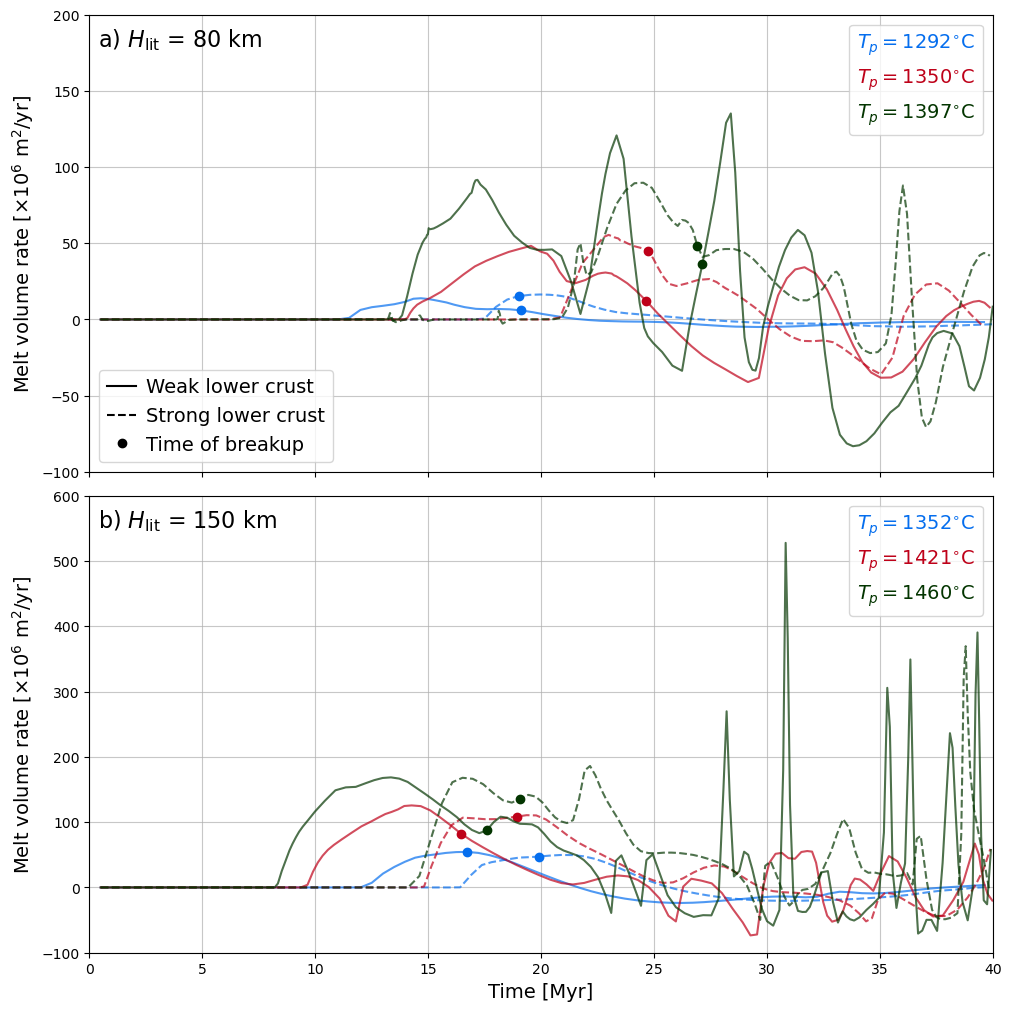

In [8]:
# Path to the model directory

groups =[#Hlit = 80 km
            ['/Doutorado/cenarios/mandyoc/rifting/lit80km/DT200_PT1292oC/1x1km2/NHK/RFT_Clc1_DT200_PT1292oC_lit80km_1x1km2_NHK',
             '/Doutorado/cenarios/mandyoc/rifting/lit80km/DT200_PT1292oC/1x1km2/NHK/RFT_Clc10_DT200_PT1292oC_lit80km_1x1km2_NHK',

             '/Doutorado/cenarios/mandyoc/rifting/lit80km/DT290_PT1350oC/1x1km2/NHK/RFT_Clc1_DT290_PT1350oC_lit80km_1x1km2_NHK',
             '/Doutorado/cenarios/mandyoc/rifting/lit80km/DT290_PT1350oC/1x1km2/NHK/RFT_Clc10_DT290_PT1350oC_lit80km_1x1km2_NHK',

             '/Doutorado/cenarios/mandyoc/rifting/lit80km/DT350_PT1397oC/1x1km2/NHK/RFT_Clc1_DT350_PT1397oC_lit80km_1x1km2_NHK',
             '/Doutorado/cenarios/mandyoc/rifting/lit80km/DT350_PT1397oC/1x1km2/NHK/RFT_Clc10_DT350_PT1397oC_lit80km_1x1km2_NHK'

            #  '/Doutorado/cenarios/mandyoc/rifting/lit80km/DT400_PT1437oC/1x1km2/NHK/RFT_Clc1_DT400_PT1437oC_lit80km_1x1km2_NHK',
            #  '/Doutorado/cenarios/mandyoc/rifting/lit80km/DT400_PT1437oC/1x1km2/NHK/RFT_Clc10_DT400_PT1437oC_lit80km_1x1km2_NHK',
            ],
                #Hlit = 150 km
            ['/Doutorado/cenarios/mandyoc/rifting/lit150km/DT200_PT1352oC/1x1km2/NHK/RTF_Clc1_DT200_PT1352oC_lit150km_1x1km2_NHK',
             '/Doutorado/cenarios/mandyoc/rifting/lit150km/DT200_PT1352oC/1x1km2/NHK/RTF_Clc10_DT200_PT1352oC_lit150km_1x1km2_NHK',

             '/Doutorado/cenarios/mandyoc/rifting/lit150km/DT290_PT1421oC/1x1km2/NHK/RFT_Clc1_DT290_PT1421oC_lit150km_1x1km2_NHK',
             '/Doutorado/cenarios/mandyoc/rifting/lit150km/DT290_PT1421oC/1x1km2/NHK/RFT_Clc10_DT290_PT1421oC_lit150km_1x1km2_NHK',

             '/Doutorado/cenarios/mandyoc/rifting/lit150km/DT350_PT1460oC/1x1km2/NHK/RTF_Clc1_DT350_PT1460oC_lit150km_1x1km2_NHK',
             '/Doutorado/cenarios/mandyoc/rifting/lit150km/DT350_PT1460oC/1x1km2/NHK/RTF_Clc10_DT350_PT1460oC_lit150km_1x1km2_NHK'
            ]
        ]

# local = True
local = False
if(local==True):
    partial_path = machine_path
else:
    external_media = 'Joao_Macedo'
    if(path[1] == 'home'):
        partial_path = f'/media/joao_macedo/{external_media}'
    elif(path[1] == 'Users'):
        partial_path = f'/Volumes/{external_media}'

#markers, lines and colors
colorsg =[['xkcd:cerulean blue',
          'xkcd:cerulean blue',
          'xkcd:scarlet',
          'xkcd:scarlet',
          'xkcd:dark green',
          'xkcd:dark green',
          #'xkcd:purple',
          #'xkcd:purple',
        ],
        ['xkcd:cerulean blue',
          'xkcd:cerulean blue',
          'xkcd:scarlet',
          'xkcd:scarlet',
          'xkcd:dark green',
          'xkcd:dark green',
        ],
        ]

linesg =[['-',
          '--',
          '-',
          '--',
          '-',
          '--',
        ],
        ['-',
         '--',
         '-',
         '--',
         '-',
         '--',
        ],
        ]

# tbs = [[19.11, 19.0, 24.66, 24.74, 27.14, 26.91,
#         # 30.74,
#         # 30.38
#         ],
#        [16.72, 19.91, 16.47, 18.93, 17.59, 19.08]
#       ]

#steps for time breakup - groups
tbsg = [[4100,
        3800,
        6500,
        6300,
        10200,
        10300,
        # 17700,
        # 17000
        ],
        [3400,
        4100,
        4000,
        4500,
        5000,
        5200]
]

melt_method = 'Dry'
# melt_method = 'Wet'

plt.close()
fig, axs = plt.subplots(2, 1, figsize=(10,10), constrained_layout=True, sharex=True)

for group, ax, colorg, lineg, tbs in zip(groups, axs, colorsg, linesg, tbsg):
    for scenario, color, line, tb in zip(group, colorg, lineg, tbs):
        # building model_path
        model_path = f'{partial_path}{scenario}'
        print(model_path.split('/')[-1])
        Vmelt_dataset = xr.open_dataset(f"{model_path}/_melt_volume_evolution_dataset.nc")
        steps = np.asarray(Vmelt_dataset.step)
        idx = np.where(steps == tb)[0][0]

        if (melt_method == 'Dry'):
          Vmelt_rate = np.asarray(np.diff(Vmelt_dataset.vmelt_dry)/np.diff(Vmelt_dataset.time)) #km2/Myr = m2/yr
          ax.plot(Vmelt_dataset.time[1:], Vmelt_rate/1.0e6, line, alpha=0.7, color=color)#M*[m2/yr]
          ax.plot(Vmelt_dataset.time[idx], Vmelt_rate[idx-1]/1.0e6, 'o', alpha=1.0, color=color)

        elif (melt_method == 'Wet'):
          Vmelt_rate = np.asarray(np.diff(Vmelt_dataset.vmelt_wet)/np.diff(Vmelt_dataset.time))
          ax.plot(Vmelt_dataset.time[1:], Vmelt_rate/1.0e6, line, alpha=0.7, color=color)
          ax.plot(Vmelt_dataset.time[idx], Vmelt_rate[idx-1]/1.0e6, 'o', alpha=1.0, color=color)

###############################################################################################
axs[0].text(0.01, 0.93, r'a) $H_{\mathrm{lit}}$ = 80 km', color='black', fontsize=16, transform=axs[0].transAxes)
axs[1].text(0.01, 0.93, r'b) $H_{\mathrm{lit}}$ = 150 km', color='black', fontsize=16, transform=axs[1].transAxes)

ax1 = axs[0].twinx()
ax1.axis('off')
ax1.plot(-10, -10, '-', color = 'xkcd:black', label = 'Weak lower crust')
ax1.plot(-10, -10, '--', color = 'xkcd:black', label = 'Strong lower crust')
ax1.plot(-10, -10, 'o', color = 'xkcd:black', label = 'Time of breakup')
ax1.legend(loc='lower left', labelcolor='linecolor', handlelength=1.5, handletextpad=0.5, fontsize=14)

ax2 = axs[0].twinx()
ax2.axis('off')
ax2.plot(-10, -10, '-', color = 'xkcd:cerulean blue', label = r'$T_p = 1292 ^{\circ}$C')
ax2.plot(-10, -10, '-', color = 'xkcd:scarlet', label = r'$T_p = 1350 ^{\circ}$C')
ax2.plot(-10, -10, '-', color = 'xkcd:dark green', label = r'$T_p = 1397 ^{\circ}$C')
ax2.legend(loc='upper right', labelcolor='linecolor', handlelength=0, handletextpad=0, fontsize=14)

ax3 = axs[1].twinx()
ax3.axis('off')
ax3.plot(-10, -10, '-', color = 'xkcd:cerulean blue', label = r'$T_p = 1352 ^{\circ}$C')
ax3.plot(-10, -10, '-', color = 'xkcd:scarlet', label = r'$T_p = 1421 ^{\circ}$C')
ax3.plot(-10, -10, '-', color = 'xkcd:dark green', label = r'$T_p = 1460 ^{\circ}$C')
ax3.legend(loc='upper right', labelcolor='linecolor', handlelength=0, handletextpad=0, fontsize=14)

###################################################################################################
if (melt_method == 'Dry'):
  axs[0].set_ylim([-100, 200])
  axs[1].set_ylim([-100, 600])
elif (melt_method == 'Wet'):
  axs[0].set_ylim([-150, 550])
  axs[1].set_ylim([100, 600])

axs[0].set_xlim(0, Vmelt_dataset.time[-1])
axs[0].set_xticks(np.arange(0, Vmelt_dataset.time[-1]+5, 5))

axs[1].set_xlabel('Time [Myr]', fontsize=14)

# axs[0].set_ylabel(r'Melt volume rate [$\times 10^6$ km$^2$/Myr]', fontsize=14)
# axs[1].set_ylabel(r'Melt volume rate [$\times 10^6$ km$^2$/Myr]', fontsize=14)
axs[0].set_ylabel(r'Melt volume rate [$\times 10^6$ m$^2$/yr]', fontsize=14)
axs[1].set_ylabel(r'Melt volume rate [$\times 10^6$ m$^2$/yr]', fontsize=14)

axs[0].grid('-k', alpha=0.7)
axs[1].grid('-k', alpha=0.7)

figname = f"RTF_Melt_Volume_Rate_{melt_method}_model"
fig.savefig(f"out/plots/{figname}.pdf", dpi=400)
fig.savefig(f"out/plots/{figname}.png", dpi=400)

# Estimating the tickness of melt production

RFT_Clc1_DT200_PT1292oC_lit80km_1x1km2_NHK
RFT_Clc10_DT200_PT1292oC_lit80km_1x1km2_NHK
RFT_Clc1_DT290_PT1350oC_lit80km_1x1km2_NHK
RFT_Clc10_DT290_PT1350oC_lit80km_1x1km2_NHK
RFT_Clc1_DT350_PT1397oC_lit80km_1x1km2_NHK
RFT_Clc10_DT350_PT1397oC_lit80km_1x1km2_NHK
RTF_Clc1_DT200_PT1352oC_lit150km_1x1km2_NHK
RTF_Clc10_DT200_PT1352oC_lit150km_1x1km2_NHK
RFT_Clc1_DT290_PT1421oC_lit150km_1x1km2_NHK
RFT_Clc10_DT290_PT1421oC_lit150km_1x1km2_NHK
RTF_Clc1_DT350_PT1460oC_lit150km_1x1km2_NHK
RTF_Clc10_DT350_PT1460oC_lit150km_1x1km2_NHK


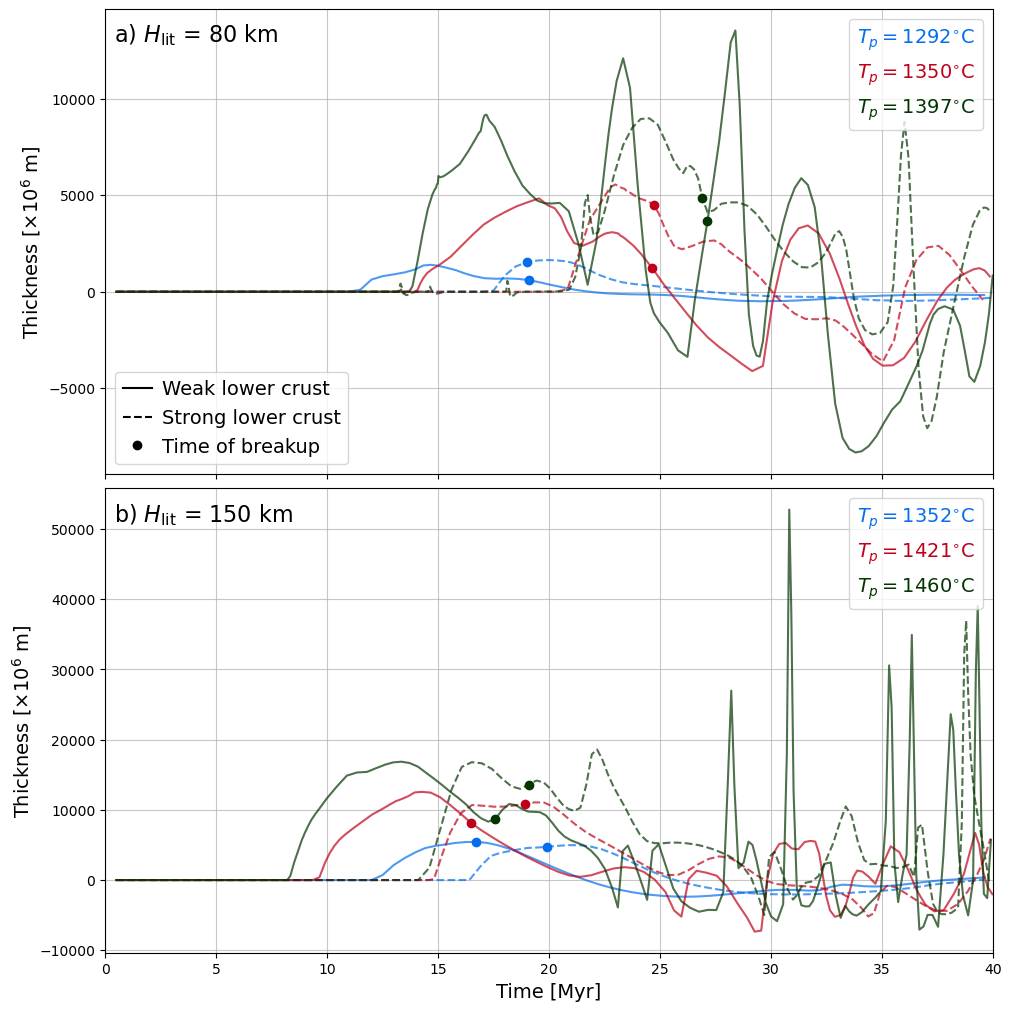

In [14]:
# Path to the model directory

groups =[#Hlit = 80 km
            ['/Doutorado/cenarios/mandyoc/rifting/lit80km/DT200_PT1292oC/1x1km2/NHK/RFT_Clc1_DT200_PT1292oC_lit80km_1x1km2_NHK',
             '/Doutorado/cenarios/mandyoc/rifting/lit80km/DT200_PT1292oC/1x1km2/NHK/RFT_Clc10_DT200_PT1292oC_lit80km_1x1km2_NHK',

             '/Doutorado/cenarios/mandyoc/rifting/lit80km/DT290_PT1350oC/1x1km2/NHK/RFT_Clc1_DT290_PT1350oC_lit80km_1x1km2_NHK',
             '/Doutorado/cenarios/mandyoc/rifting/lit80km/DT290_PT1350oC/1x1km2/NHK/RFT_Clc10_DT290_PT1350oC_lit80km_1x1km2_NHK',

             '/Doutorado/cenarios/mandyoc/rifting/lit80km/DT350_PT1397oC/1x1km2/NHK/RFT_Clc1_DT350_PT1397oC_lit80km_1x1km2_NHK',
             '/Doutorado/cenarios/mandyoc/rifting/lit80km/DT350_PT1397oC/1x1km2/NHK/RFT_Clc10_DT350_PT1397oC_lit80km_1x1km2_NHK'

            #  '/Doutorado/cenarios/mandyoc/rifting/lit80km/DT400_PT1437oC/1x1km2/NHK/RFT_Clc1_DT400_PT1437oC_lit80km_1x1km2_NHK',
            #  '/Doutorado/cenarios/mandyoc/rifting/lit80km/DT400_PT1437oC/1x1km2/NHK/RFT_Clc10_DT400_PT1437oC_lit80km_1x1km2_NHK',
            ],
                #Hlit = 150 km
            ['/Doutorado/cenarios/mandyoc/rifting/lit150km/DT200_PT1352oC/1x1km2/NHK/RTF_Clc1_DT200_PT1352oC_lit150km_1x1km2_NHK',
             '/Doutorado/cenarios/mandyoc/rifting/lit150km/DT200_PT1352oC/1x1km2/NHK/RTF_Clc10_DT200_PT1352oC_lit150km_1x1km2_NHK',

             '/Doutorado/cenarios/mandyoc/rifting/lit150km/DT290_PT1421oC/1x1km2/NHK/RFT_Clc1_DT290_PT1421oC_lit150km_1x1km2_NHK',
             '/Doutorado/cenarios/mandyoc/rifting/lit150km/DT290_PT1421oC/1x1km2/NHK/RFT_Clc10_DT290_PT1421oC_lit150km_1x1km2_NHK',

             '/Doutorado/cenarios/mandyoc/rifting/lit150km/DT350_PT1460oC/1x1km2/NHK/RTF_Clc1_DT350_PT1460oC_lit150km_1x1km2_NHK',
             '/Doutorado/cenarios/mandyoc/rifting/lit150km/DT350_PT1460oC/1x1km2/NHK/RTF_Clc10_DT350_PT1460oC_lit150km_1x1km2_NHK'
            ]
        ]

# local = True
local = False
if(local==True):
    partial_path = machine_path
else:
    external_media = 'Joao_Macedo'
    if(path[1] == 'home'):
        partial_path = f'/media/joao_macedo/{external_media}'
    elif(path[1] == 'Users'):
        partial_path = f'/Volumes/{external_media}'

#markers, lines and colors
colorsg =[['xkcd:cerulean blue',
          'xkcd:cerulean blue',
          'xkcd:scarlet',
          'xkcd:scarlet',
          'xkcd:dark green',
          'xkcd:dark green',
          #'xkcd:purple',
          #'xkcd:purple',
        ],
        ['xkcd:cerulean blue',
          'xkcd:cerulean blue',
          'xkcd:scarlet',
          'xkcd:scarlet',
          'xkcd:dark green',
          'xkcd:dark green',
        ],
        ]

linesg =[['-',
          '--',
          '-',
          '--',
          '-',
          '--',
        ],
        ['-',
         '--',
         '-',
         '--',
         '-',
         '--',
        ],
        ]

# tbs = [[19.11, 19.0, 24.66, 24.74, 27.14, 26.91,
#         # 30.74,
#         # 30.38
#         ],
#        [16.72, 19.91, 16.47, 18.93, 17.59, 19.08]
#       ]

#steps for time breakup - groups
tbsg = [[4100,
        3800,
        6500,
        6300,
        10200,
        10300,
        # 17700,
        # 17000
        ],
        [3400,
        4100,
        4000,
        4500,
        5000,
        5200]
]

melt_method = 'Dry'
# melt_method = 'Wet'

extension_rate = 1.0 * 1.0e-2 #m/yr
plt.close()
fig, axs = plt.subplots(2, 1, figsize=(10,10), constrained_layout=True, sharex=True)

for group, ax, colorg, lineg, tbs in zip(groups, axs, colorsg, linesg, tbsg):
    for scenario, color, line, tb in zip(group, colorg, lineg, tbs):
        # building model_path
        model_path = f'{partial_path}{scenario}'
        print(model_path.split('/')[-1])
        Vmelt_dataset = xr.open_dataset(f"{model_path}/_melt_volume_evolution_dataset.nc")
        steps = np.asarray(Vmelt_dataset.step)
        idx = np.where(steps == tb)[0][0]

        if (melt_method == 'Dry'):
          Vmelt_rate = np.asarray(np.diff(Vmelt_dataset.vmelt_dry)/np.diff(Vmelt_dataset.time))#km2/Myr = m2/yr

        elif (melt_method == 'Wet'):
          Vmelt_rate = np.asarray(np.diff(Vmelt_dataset.vmelt_wet)/np.diff(Vmelt_dataset.time))#km2/Myr = m2/yr

        Hmelt = (Vmelt_rate)/extension_rate #m2/yr / m/yr = m
        # ax.plot(Vmelt_dataset.time[1:], Hmelt, line, alpha=0.7, color=color)
        # ax.plot(Vmelt_dataset.time[idx], Hmelt[idx-1], 'o', alpha=1.0, color=color)
        ax.plot(Vmelt_dataset.time[1:], Hmelt/1.0e6, line, alpha=0.7, color=color)
        ax.plot(Vmelt_dataset.time[idx], Hmelt[idx-1]/1.0e6, 'o', alpha=1.0, color=color)

###############################################################################################
axs[0].text(0.01, 0.93, r'a) $H_{\mathrm{lit}}$ = 80 km', color='black', fontsize=16, transform=axs[0].transAxes)
axs[1].text(0.01, 0.93, r'b) $H_{\mathrm{lit}}$ = 150 km', color='black', fontsize=16, transform=axs[1].transAxes)

ax1 = axs[0].twinx()
ax1.axis('off')
ax1.plot(-10, -10, '-', color = 'xkcd:black', label = 'Weak lower crust')
ax1.plot(-10, -10, '--', color = 'xkcd:black', label = 'Strong lower crust')
ax1.plot(-10, -10, 'o', color = 'xkcd:black', label = 'Time of breakup')
ax1.legend(loc='lower left', labelcolor='linecolor', handlelength=1.5, handletextpad=0.5, fontsize=14)

ax2 = axs[0].twinx()
ax2.axis('off')
ax2.plot(-10, -10, '-', color = 'xkcd:cerulean blue', label = r'$T_p = 1292 ^{\circ}$C')
ax2.plot(-10, -10, '-', color = 'xkcd:scarlet', label = r'$T_p = 1350 ^{\circ}$C')
ax2.plot(-10, -10, '-', color = 'xkcd:dark green', label = r'$T_p = 1397 ^{\circ}$C')
ax2.legend(loc='upper right', labelcolor='linecolor', handlelength=0, handletextpad=0, fontsize=14)

ax3 = axs[1].twinx()
ax3.axis('off')
ax3.plot(-10, -10, '-', color = 'xkcd:cerulean blue', label = r'$T_p = 1352 ^{\circ}$C')
ax3.plot(-10, -10, '-', color = 'xkcd:scarlet', label = r'$T_p = 1421 ^{\circ}$C')
ax3.plot(-10, -10, '-', color = 'xkcd:dark green', label = r'$T_p = 1460 ^{\circ}$C')
ax3.legend(loc='upper right', labelcolor='linecolor', handlelength=0, handletextpad=0, fontsize=14)

###################################################################################################
# if (melt_method == 'Dry'):
#   axs[0].set_ylim([-100, 200])
#   axs[1].set_ylim([-100, 600])
# elif (melt_method == 'Wet'):
#   axs[0].set_ylim([-150, 550])
#   axs[1].set_ylim([100, 600])

axs[0].set_xlim(0, Vmelt_dataset.time[-1])
axs[0].set_xticks(np.arange(0, Vmelt_dataset.time[-1]+5, 5))

axs[1].set_xlabel('Time [Myr]', fontsize=14)

axs[0].set_ylabel(r'Thickness [$\times 10^6$ m]', fontsize=14)
axs[1].set_ylabel(r'Thickness [$\times 10^6$ m]', fontsize=14)

axs[0].grid('-k', alpha=0.7)
axs[1].grid('-k', alpha=0.7)

figname = f"RTF_Melt_Thickness_evolution_{melt_method}_model"
fig.savefig(f"out/plots/{figname}.pdf", dpi=400)
fig.savefig(f"out/plots/{figname}.png", dpi=400)